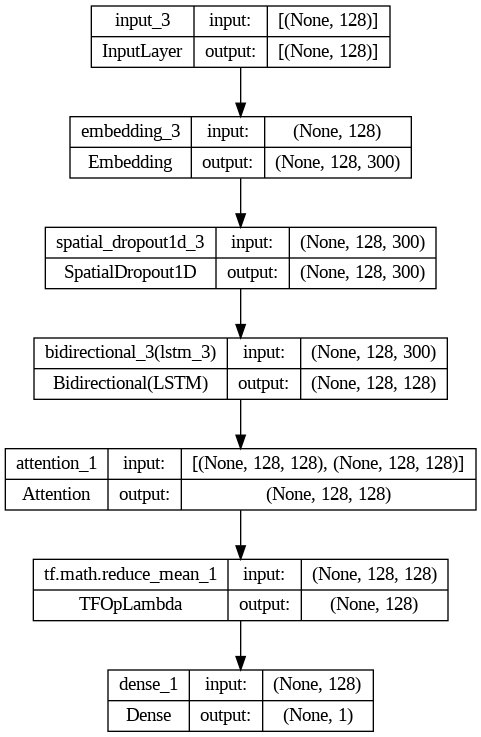

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Input, Attention, GlobalAveragePooling1D
from tensorflow.keras.initializers import Constant
from tensorflow.keras.utils import plot_model
import numpy as np
import tensorflow as tf

# Define LSTM model with embeddings and attention
def create_lstm_model(input_dim, output_dim, max_sequence_length, embedding_matrix):
    inputs = Input(shape=(max_sequence_length,))
    embedding_layer = Embedding(input_dim, output_dim, input_length=max_sequence_length,
                                embeddings_initializer=Constant(embedding_matrix),
                                trainable=False)(inputs)
    x = SpatialDropout1D(0.2)(embedding_layer)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)

    # Use built-in Attention layer
    attention = Attention()([x, x])
    x = tf.reduce_mean(attention, axis=1)  # Use tf.reduce_mean to aggregate attention output

    outputs = Dense(1, activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example embedding matrix and parameters
input_dim = 10000  # Size of vocabulary
output_dim = 300    # Dimension of embeddings
max_sequence_length = 128  # Maximum length of input sequences
embedding_matrix = np.random.random((input_dim, output_dim))  # Random embedding matrix for illustration

# Create the model
model = create_lstm_model(input_dim, output_dim, max_sequence_length, embedding_matrix)

# Plot the model architecture
plot_model(model, to_file='lstm_attention_model.png', show_shapes=True, show_layer_names=True)
